In [24]:
import findspark
findspark.init('E:\spark\spark-3.3.1-bin-hadoop2/')
import pyspark
import seaborn as sns
import pandas as pd

In [25]:
from pyspark.sql import SparkSession
from pyspark import SparkContext

In [26]:
mongo_ip = 'mongodb://localhost:27017/Cleaned_Insurance'

In [27]:
spark = SparkSession \
.builder\
.appName("myApp")\
.config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:3.0.1")\
.getOrCreate()

In [28]:
b_08 = spark.read.format("com.mongodb.spark.sql.DefaultSource").option("uri",mongo_ip + ".ben_2008").load()

In [29]:
b_08.createOrReplaceTempView('b_08')

In [30]:
b_09 = spark.read.format("com.mongodb.spark.sql.DefaultSource").option("uri",mongo_ip + ".ben_2009").load()

In [31]:
b_09.createOrReplaceTempView('b_09')

In [32]:
b_10 = spark.read.format("com.mongodb.spark.sql.DefaultSource").option("uri",mongo_ip + ".ben_2010").load()

In [33]:
b_10.createOrReplaceTempView('b_10')

In [34]:
from pyspark.ml.feature import Bucketizer

boundaries = [25,30,45,60,75,90,105]
category = ['25-30','31-45','46-60','61-75','76-90','91-105']

# Create the bucketizer instance
bucketizer = Bucketizer(splits=boundaries, inputCol="Age", outputCol="Age_Group")

# Apply the bucketizer to the DataFrame
b_8 = bucketizer.transform(b_08)

In [35]:
b_8.createOrReplaceTempView('b_8')

In [36]:
from pyspark.sql.functions import regexp_replace
b_8 = b_8.withColumn('Age_Group', regexp_replace('Age_Group', '0.0', '25-30'))\
.withColumn('Age_Group', regexp_replace('Age_Group', '1.0', '31-45'))\
.withColumn('Age_Group', regexp_replace('Age_Group', '2.0', '46-60'))\
.withColumn('Age_Group', regexp_replace('Age_Group', '3.0', '61-75'))\
.withColumn('Age_Group', regexp_replace('Age_Group', '4.0', '76-90'))\
.withColumn('Age_Group', regexp_replace('Age_Group', '5.0', '91-105'))

In [37]:
b_8.createOrReplaceTempView('b_8')

In [38]:
spark.sql("select distinct Age_Group from b_8").show()

+---------+
|Age_Group|
+---------+
|    31-45|
|    25-30|
|    46-60|
|    76-90|
|   91-105|
|    61-75|
+---------+



In [39]:
from pyspark.ml.feature import Bucketizer

boundaries = [25,30,45,60,75,90,105]
category = ['25-30','31-45','46-60','61-75','76-90','91-105']

# Create the bucketizer instance
bucketizer = Bucketizer(splits=boundaries, inputCol="Age", outputCol="Age_Group")

# Apply the bucketizer to the DataFrame
b_9 = bucketizer.transform(b_09)

In [40]:
b_9.createOrReplaceTempView('b_9')

In [41]:
from pyspark.sql.functions import regexp_replace
b_9 = b_9.withColumn('Age_Group', regexp_replace('Age_Group', '0.0', '25-30'))\
.withColumn('Age_Group', regexp_replace('Age_Group', '1.0', '31-45'))\
.withColumn('Age_Group', regexp_replace('Age_Group', '2.0', '46-60'))\
.withColumn('Age_Group', regexp_replace('Age_Group', '3.0', '61-75'))\
.withColumn('Age_Group', regexp_replace('Age_Group', '4.0', '76-90'))\
.withColumn('Age_Group', regexp_replace('Age_Group', '5.0', '91-105'))

In [42]:
b_9.createOrReplaceTempView('b_9')

In [43]:
from pyspark.ml.feature import Bucketizer

boundaries = [25,30,45,60,75,90,105]

# Create the bucketizer instance
bucketizer = Bucketizer(splits=boundaries, inputCol="Age", outputCol="Age_Group")

# Apply the bucketizer to the DataFrame
b_10 = bucketizer.transform(b_10)

In [44]:
b_10.createOrReplaceTempView('b_10')

In [45]:
from pyspark.sql.functions import regexp_replace
b_10 = b_10.withColumn('Age_Group', regexp_replace('Age_Group', '0.0', '25-30'))\
.withColumn('Age_Group', regexp_replace('Age_Group', '1.0', '31-45'))\
.withColumn('Age_Group', regexp_replace('Age_Group', '2.0', '46-60'))\
.withColumn('Age_Group', regexp_replace('Age_Group', '3.0', '61-75'))\
.withColumn('Age_Group', regexp_replace('Age_Group', '4.0', '76-90'))\
.withColumn('Age_Group', regexp_replace('Age_Group', '5.0', '91-105'))

In [46]:
b_10.createOrReplaceTempView('b_10')

In [47]:
b_10.columns

['Age',
 'Alzheimer',
 'Cancer',
 'Chronic_Kidney_Disease',
 'Chronic_Obstructive_Pulmonary_Disease',
 'DESYNPUF_ID',
 'Date_of_birth',
 'Date_of_death',
 'Depression',
 'Diabetes',
 'End_stage_renal_disease_Indicator',
 'Gender',
 'Heart_Failure',
 'Inpatient_primary_payer_reimbursement_amount',
 'Inpatient_reimbursement_amount',
 'Inpatient_responsibility_amount',
 'Ischemic_Heart_Disease',
 'Osteoporosis',
 'Outpatient_primary_payer_reimbursement_amount',
 'Outpatient_reimbursement_amount',
 'Outpatient_responsibility_amount',
 'Race_Code',
 'Rheumatoid_arthritis_osteoarthritis',
 'State_Code',
 'Stroke_transient_Ischemic_Attack',
 'Total_months_HMO_coverage',
 'Total_months_partA_coverage',
 'Total_months_partB_coverage',
 'Total_months_partD_coverage',
 '_id',
 'total_number_of_Insurance',
 'total_number_of_diseases',
 'year',
 'Age_Group']

In [48]:
b_query = spark.sql("select Age_group,count(Date_of_death) as Total_Deaths from b_10 group by Age_group")

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

In [177]:
b_10_pandas = b_query.toPandas()

In [178]:
b_10_pandas = b_10_pandas.set_index('Age_group')

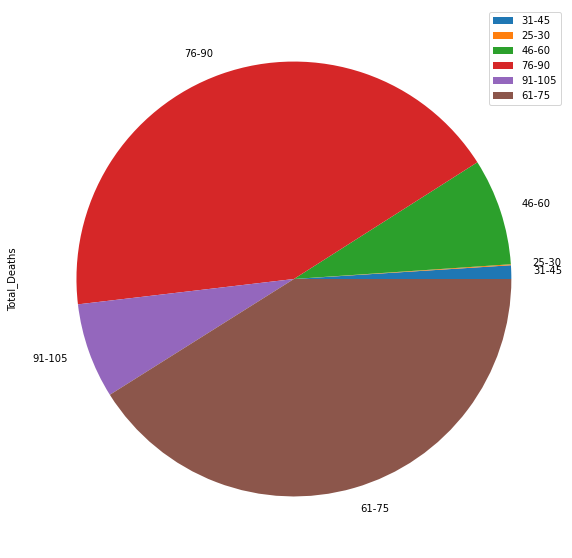

In [179]:
plot_10 = b_10_pandas.plot.pie(y='Total_Deaths', figsize=(30, 10))

In [180]:
b_query_8 = spark.sql("select Age_group,count(Date_of_death) as Total_Deaths from b_8 group by Age_group")

In [181]:
b_8_pandas = b_query_8.toPandas()

In [182]:
b_8_pandas = b_8_pandas.set_index('Age_group')

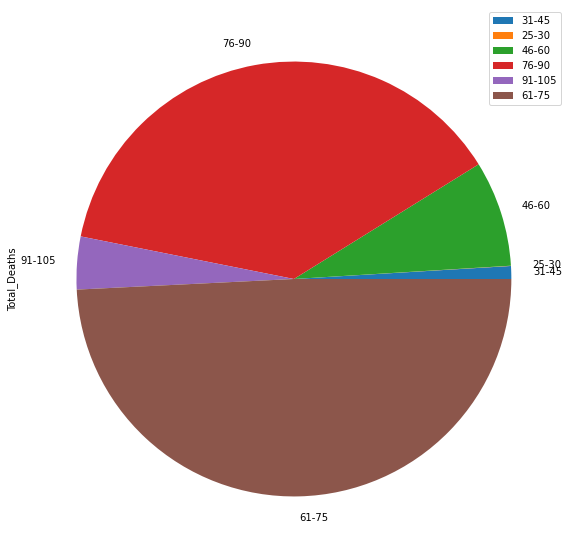

In [183]:
plot_8 = b_8_pandas.plot.pie(y='Total_Deaths', figsize=(30, 10))

In [50]:
code = spark.read.format("com.mongodb.spark.sql.DefaultSource").option("uri",mongo_ip + ".code").load()

In [51]:
inp = spark.read.format("com.mongodb.spark.sql.DefaultSource").option("uri",mongo_ip + ".Inpatient").load()

In [52]:
inp.createOrReplaceTempView('inp')

In [53]:
inp.columns

['Beneficiary_Blood_Deductible_Liability_Amount',
 'Beneficiary_Inpatient_Deductible_Amount',
 'Beneficiary_PartA_Coinsurance_Liability_Amount',
 'Claim_Admission_Date',
 'Claim_Admitting_Diagnosis_Code',
 'Claim_End_Date',
 'Claim_ID',
 'Claim_Pass_Thru_Per_Diem_Amount',
 'Claim_Payment_Amount',
 'Claim_Start_Date',
 'Claim_Utilization_Day_Count',
 'DESYNPUF_ID',
 'Inpatient_discharged_date',
 'Primary_Payer_Claim_Paid_Amount',
 'Provider_Number',
 '_id']

In [54]:
spark.sql("select Claim_End_Date from inp").show()

+-------------------+
|     Claim_End_Date|
+-------------------+
|2009-12-17 00:00:00|
|2009-05-15 00:00:00|
|2008-11-18 00:00:00|
|2008-07-25 00:00:00|
|2009-02-14 00:00:00|
|2009-04-27 00:00:00|
|2009-06-17 00:00:00|
|2008-05-21 00:00:00|
|2009-05-15 00:00:00|
|2008-05-22 00:00:00|
|2008-06-13 00:00:00|
|2008-04-25 00:00:00|
|2008-05-20 00:00:00|
|2008-02-04 00:00:00|
|2008-07-01 00:00:00|
|2008-09-24 00:00:00|
|2009-02-10 00:00:00|
|2009-03-10 00:00:00|
|2009-06-11 00:00:00|
|2009-11-03 00:00:00|
+-------------------+
only showing top 20 rows



In [189]:
inp_pandas = inp.toPandas()

In [55]:
final = (b_8.join(inp,
                               on = b_8['DESYNPUF_ID'] == inp['DESYNPUF_ID'],
                               how = 'inner')
                         .select(b_8['*'],
                                 inp['Claim_Admitting_Diagnosis_Code']))

In [56]:
final.createOrReplaceTempView('final')

In [57]:
final.columns

['Age',
 'Alzheimer',
 'Cancer',
 'Chronic_Kidney_Disease',
 'Chronic_Obstructive_Pulmonary_Disease',
 'DESYNPUF_ID',
 'Date_of_birth',
 'Date_of_death',
 'Depression',
 'Diabetes',
 'End_stage_renal_disease_Indicator',
 'Gender',
 'Heart_Failure',
 'Inpatient_primary_payer_reimbursement_amount',
 'Inpatient_reimbursement_amount',
 'Inpatient_responsibility_amount',
 'Ischemic_Heart_Disease',
 'Osteoporosis',
 'Outpatient_primary_payer_reimbursement_amount',
 'Outpatient_reimbursement_amount',
 'Outpatient_responsibility_amount',
 'Race_Code',
 'Rheumatoid_arthritis_osteoarthritis',
 'State_Code',
 'Stroke_transient_Ischemic_Attack',
 'Total_months_HMO_coverage',
 'Total_months_partA_coverage',
 'Total_months_partB_coverage',
 'Total_months_partD_coverage',
 '_id',
 'total_number_of_Insurance',
 'total_number_of_diseases',
 'year',
 'Age_Group',
 'Claim_Admitting_Diagnosis_Code']

In [193]:
spark.sql("select Age_group, Claim_Admitting_Diagnosis_Code from final").show()

+---------+------------------------------+
|Age_group|Claim_Admitting_Diagnosis_Code|
+---------+------------------------------+
|    76-90|                          5990|
|    76-90|                         42731|
|    76-90|                          4271|
|    76-90|                         78060|
|    76-90|                         71595|
|    76-90|                         71536|
|    76-90|                         71590|
|    76-90|                          5780|
|    76-90|                          0389|
|    46-60|                         29620|
|    46-60|                         78009|
|    76-90|                          4280|
|    76-90|                         78605|
|    61-75|                         78650|
|    61-75|                          7806|
|    61-75|                         30391|
|   91-105|                          5990|
|    61-75|                         78900|
|    61-75|                         64513|
|    61-75|                         78097|
+---------+

In [58]:
spark.sql("select Age_group,max(Claim_Admitting_Diagnosis_Code) from final group by Age_group").show()

+---------+-----------------------------------+
|Age_group|max(Claim_Admitting_Diagnosis_Code)|
+---------+-----------------------------------+
|    25-30|                              V6284|
|    31-45|                               V719|
|    46-60|                               V719|
|    61-75|                              V7284|
|    76-90|                               V790|
|   91-105|                              V7284|
+---------+-----------------------------------+



In [ ]:
select Age_group,max(Claim_Admitting_Diagnosis_Code) from final group by Age_group

In [72]:
spark.sql('select Age_group,Claim_Admitting_Diagnosis_Code,Disease_count from\
(select Age_group,Claim_Admitting_Diagnosis_Code,count(*) as Disease_count,row_number() over \
(partition by Age_group order by Age_group) as Highest from final group by Age_group,Claim_Admitting_Diagnosis_Code \
order by Age_group desc) where Highest=1').show()

+---------+------------------------------+-------------+
|Age_group|Claim_Admitting_Diagnosis_Code|Disease_count|
+---------+------------------------------+-------------+
|   91-105|                          5990|          254|
|    76-90|                         42789|          387|
|    61-75|                         41041|           59|
|    46-60|                          2948|           32|
|    31-45|                         78900|          126|
|    25-30|                          5789|           17|
+---------+------------------------------+-------------+



In [73]:
spark.sql('select Age_group,Claim_Admitting_Diagnosis_Code,count(*),row_number() over (partition by Age_group order by Age_group) as Highest from final group by Age_group,Claim_Admitting_Diagnosis_Code order by Highest').show()

+---------+------------------------------+--------+-------+
|Age_group|Claim_Admitting_Diagnosis_Code|count(1)|Highest|
+---------+------------------------------+--------+-------+
|   91-105|                          5990|     254|      1|
|    31-45|                         29590|      16|      1|
|    25-30|                         78097|      36|      1|
|    61-75|                         45341|      95|      1|
|    46-60|                          2768|      20|      1|
|    76-90|                         29411|      11|      1|
|   91-105|                         72672|       1|      2|
|    25-30|                         70707|       1|      2|
|    76-90|                          9663|       6|      2|
|    46-60|                         27651|     170|      2|
|    61-75|                         78650|    3067|      2|
|    31-45|                         78900|     126|      2|
|    46-60|                         29530|      44|      3|
|    61-75|                          411

In [90]:
spark.sql('select Claim_Admitting_Diagnosis_Code,count(*) as count from final group by Claim_Admitting_Diagnosis_Code order by count desc limit 1 ').show()

+------------------------------+-----+
|Claim_Admitting_Diagnosis_Code|count|
+------------------------------+-----+
|                         78605| 8231|
+------------------------------+-----+



## No. of Beneficiaries Male and Female

In [11]:
from pyspark.sql.functions import when
b_08 = b_08.withColumn("Gender", when(b_08["Gender"] == 1 , 'M').otherwise('F'))

In [12]:
b_08.createOrReplaceTempView('b_08')

In [14]:
MR = spark.sql("select Gender,count(*) as No_of_Beneficiary from b_08 group by Gender")

In [16]:
MRP = MR.toPandas()

In [17]:
MRP.to_csv('C:/Users/ASUS/Desktop/Insurance/Queries/Benef/M_F_ratio_08.csv',  index=False)

In [19]:
from pyspark.sql.functions import when
b_09 = b_09.withColumn("Gender", when(b_09["Gender"] == 1 , 'M').otherwise('F'))

b_09.createOrReplaceTempView('b_09')

MR = spark.sql("select Gender,count(*) as No_of_Beneficiary from b_09 group by Gender")

MRP = MR.toPandas()

MRP.to_csv('C:/Users/ASUS/Desktop/Insurance/Queries/Benef/M_F_ratio_09.csv',  index=False)

In [20]:
from pyspark.sql.functions import when
b_10 = b_10.withColumn("Gender", when(b_10["Gender"] == 1 , 'M').otherwise('F'))

b_10.createOrReplaceTempView('b_10')

MR = spark.sql("select Gender,count(*) as No_of_Beneficiary from b_10 group by Gender")

MRP = MR.toPandas()

MRP.to_csv('C:/Users/ASUS/Desktop/Insurance/Queries/Benef/M_F_ratio_10.csv',  index=False)